<font size=6><b>lec08. [실전-데이콘] 전화해지 고객 분류

<img src="./imgs/lec08.png">
* ref : * ref : https://dacon.io/competitions/official/236075/data

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns


sns.set()

#-------------------- 차트 관련 속성 (한글처리, 그리드) -----------
plt.rcParams['font.family']= 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

#-------------------- 주피터 , 출력결과 넓이 늘리기 ---------------
# from IPython.core.display import display, HTML
from IPython.display import display, HTML

display(HTML("<style>.container{width:100% !important;}</style>"))
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
pd.set_option('max_colwidth', None)

import warnings
warnings.filterwarnings(action='ignore')

In [2]:
# ----------------- 학습 ----------------------
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# ----------------- 평가 ----------------------
from sklearn.metrics import confusion_matrix

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.metrics import precision_recall_curve, plot_precision_recall_curve

from sklearn.metrics import roc_auc_score, roc_curve, plot_roc_curve

# Data Load

In [3]:
train = pd.read_csv("./train.csv")
test=pd.read_csv("./test.csv")
submit=pd.read_csv("./sample_submission.csv")

In [4]:
train.head()

,ID,가입일,음성사서함이용,주간통화시간,주간통화횟수,주간통화요금,저녁통화시간,저녁통화횟수,저녁통화요금,밤통화시간,밤통화횟수,밤통화요금,상담전화건수,전화해지여부
0,TRAIN_00000,329,0,99.2,93,27.3,268.8,68,28.92,262.9,328,32.89,2,0
1,TRAIN_00001,2,80,323.9,323,83.7,269.4,326,32.09,322.8,209,32.32,2,0
2,TRAIN_00002,93,28,282.4,323,34.2,207.0,322,32.82,280.8,328,8.28,0,0
3,TRAIN_00003,223,1,221.4,223,25.1,233.0,61,23.90,203.8,234,9.36,0,0
4,TRAIN_00004,222,0,96.3,222,28.7,223.9,69,28.08,263.1,223,2.80,8,0


In [5]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12943 entries, 0 to 12942
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   ID       12943 non-null  object 
 1   가입일      12943 non-null  int64  
 2   음성사서함이용  12943 non-null  int64  
 3   주간통화시간   12943 non-null  float64
 4   주간통화횟수   12943 non-null  int64  
 5   주간통화요금   12943 non-null  float64
 6   저녁통화시간   12943 non-null  float64
 7   저녁통화횟수   12943 non-null  int64  
 8   저녁통화요금   12943 non-null  float64
 9   밤통화시간    12943 non-null  float64
 10  밤통화횟수    12943 non-null  int64  
 11  밤통화요금    12943 non-null  float64
 12  상담전화건수   12943 non-null  int64  
dtypes: float64(6), int64(6), object(1)
memory usage: 1.3+ MB


In [6]:
# train.reset_index()

In [7]:
train=train.drop('ID',axis=1)

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30200 entries, 0 to 30199
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   가입일      30200 non-null  int64  
 1   음성사서함이용  30200 non-null  int64  
 2   주간통화시간   30200 non-null  float64
 3   주간통화횟수   30200 non-null  int64  
 4   주간통화요금   30200 non-null  float64
 5   저녁통화시간   30200 non-null  float64
 6   저녁통화횟수   30200 non-null  int64  
 7   저녁통화요금   30200 non-null  float64
 8   밤통화시간    30200 non-null  float64
 9   밤통화횟수    30200 non-null  int64  
 10  밤통화요금    30200 non-null  float64
 11  상담전화건수   30200 non-null  int64  
 12  전화해지여부   30200 non-null  int64  
dtypes: float64(6), int64(7)
memory usage: 3.0 MB


In [9]:
train.head()

,가입일,음성사서함이용,주간통화시간,주간통화횟수,주간통화요금,저녁통화시간,저녁통화횟수,저녁통화요금,밤통화시간,밤통화횟수,밤통화요금,상담전화건수,전화해지여부
0,329,0,99.2,93,27.3,268.8,68,28.92,262.9,328,32.89,2,0
1,2,80,323.9,323,83.7,269.4,326,32.09,322.8,209,32.32,2,0
2,93,28,282.4,323,34.2,207.0,322,32.82,280.8,328,8.28,0,0
3,223,1,221.4,223,25.1,233.0,61,23.90,203.8,234,9.36,0,0
4,222,0,96.3,222,28.7,223.9,69,28.08,263.1,223,2.80,8,0


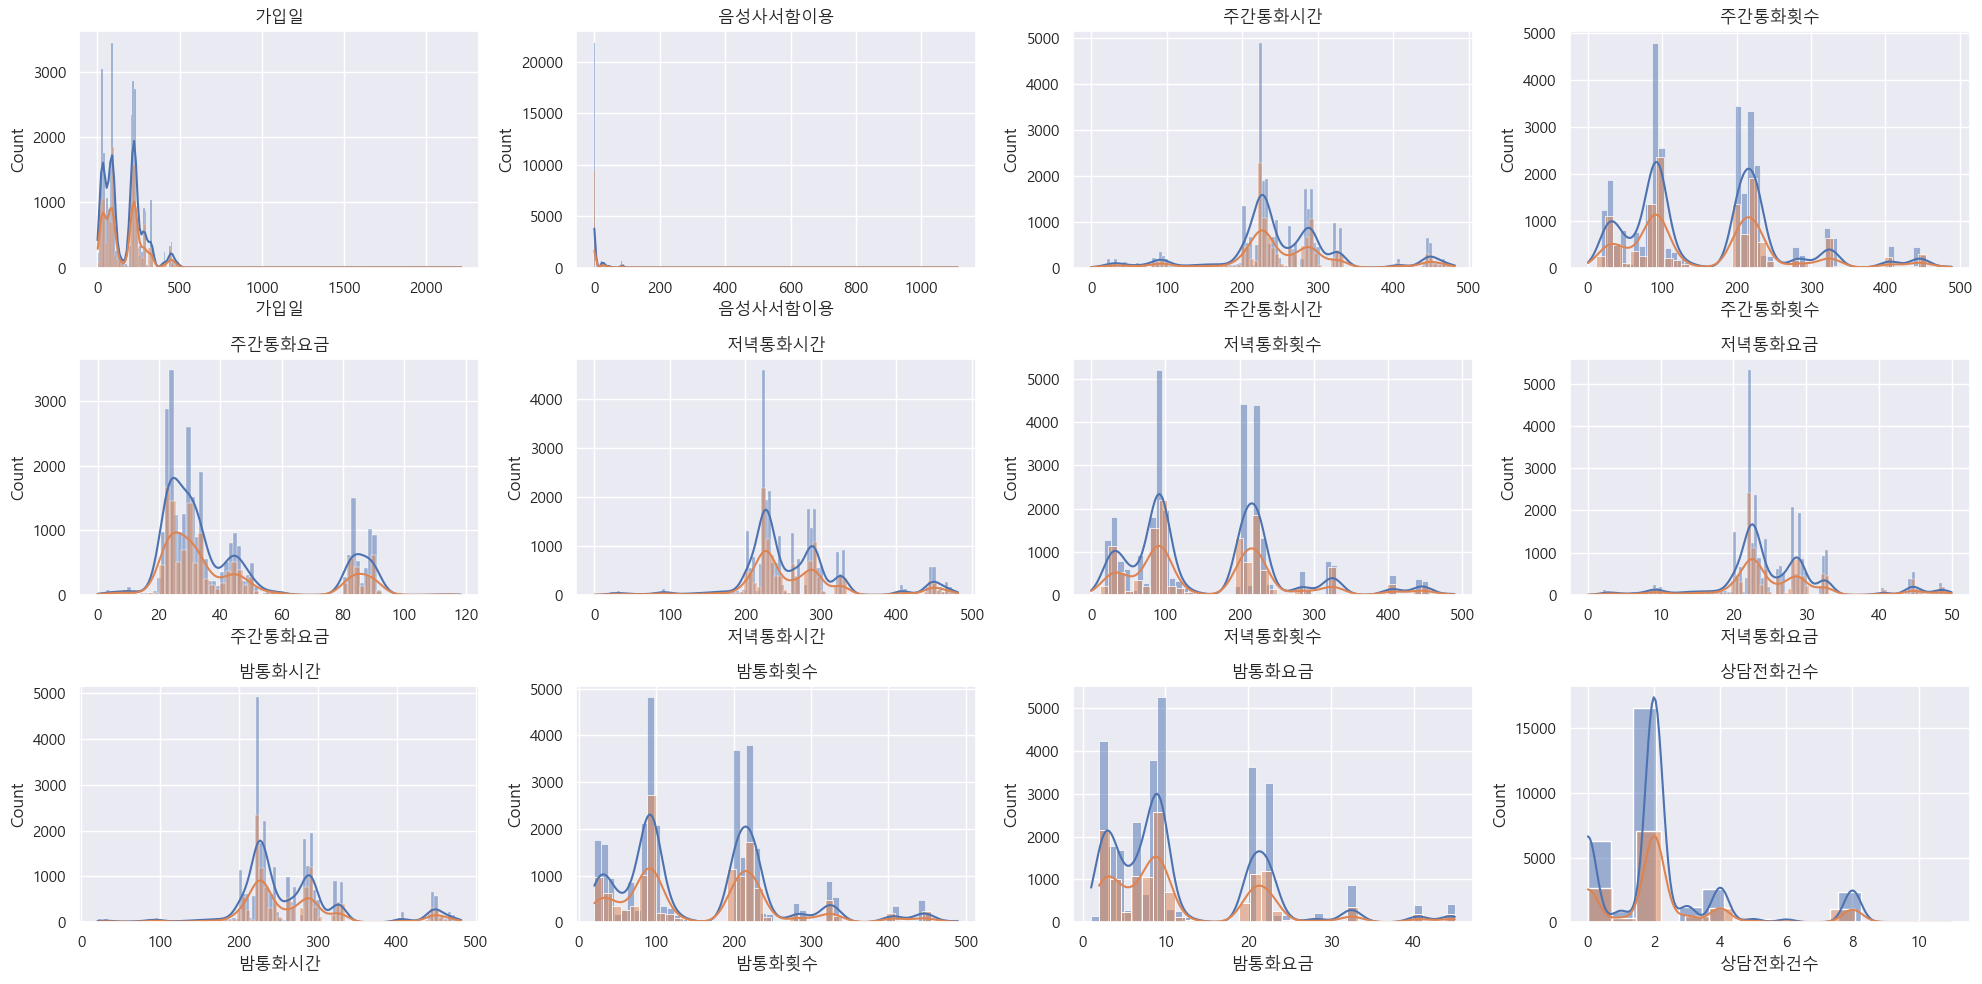

In [10]:
fig, axes = plt.subplots(3, 4, figsize=(20, 10)  ) 

col_list = ['가입일', '음성사서함이용', '주간통화시간', '주간통화횟수', '주간통화요금', '저녁통화시간', '저녁통화횟수','저녁통화요금', '밤통화시간', '밤통화횟수', '밤통화요금', '상담전화건수']
for i, col in enumerate(col_list) :  #train.columns) :
    r = i//4
    c = i%4
    #print(i,r, c ,col)
    axes[r][c].set_title(col)
    sns.histplot(data=train, x=col, ax=axes[r][c],     kde=True )
    sns.histplot(data=test, x=col, ax=axes[r][c],     kde=True )
    # axes[0][0].set_title("count")
    # sns.histplot(data=train, x='count', ax=axes[0][0],     kde=True )

plt.tight_layout()
plt.show()

- pair plot 에 강한 상관성 보이는 피쳐들 있음(직선모양)
- 음성사서함 이용(0)의 max값
- ★저녁통화시간, 저녁 통화횟수, 저녁 통화 요금(1(해지고객)) min의 값이 확연히 다름   --> 해지고객들은 저녁에 무엇을 할까?
- 0,1 비교 가능 : 가입일, 음성 사서함 이용, 저녁통화시간, 저녁 통화횟수, 저녁 통화 요금
- under&over sampling 후 점수 확인

## 점수

In [11]:
y = train['전화해지여부']
X = train.drop(['전화해지여부'], axis=1)

X_train,X_test,y_train,y_test = train_test_split(X, y , test_size=0.2)
model = RandomForestClassifier(random_state=11)
model.fit(X_train, y_train)
pred = model.predict(X_test)

print(  confusion_matrix(y_test,  pred)   )
print(f"정확도: {accuracy_score(y_test, pred):.4f}, 정밀도: {precision_score(y_test, pred):.4f}, 재현율: {recall_score(y_test, pred):.4f}, F1: {f1_score(y_test, pred):.4f}")

[[5290  106]
 [ 409  235]]
정확도: 0.9147, 정밀도: 0.6891, 재현율: 0.3649, F1: 0.4772


# EDA

## Heatmap

<AxesSubplot: >

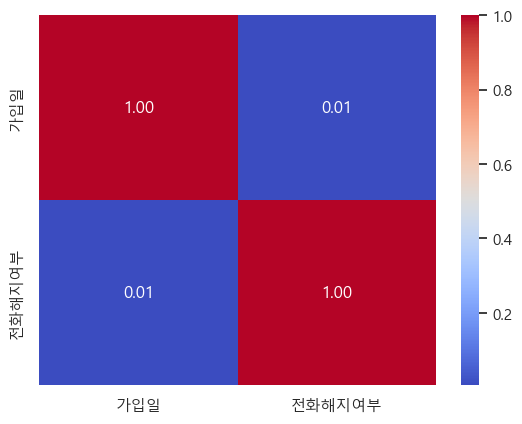

In [12]:
sns.heatmap(train[['가입일','전화해지여부']].corr(),annot=True, fmt=".2f", cmap='coolwarm')

## pair plot
- 주간, 저녁, 밤의 통화시간-요금 상관성 높아보임

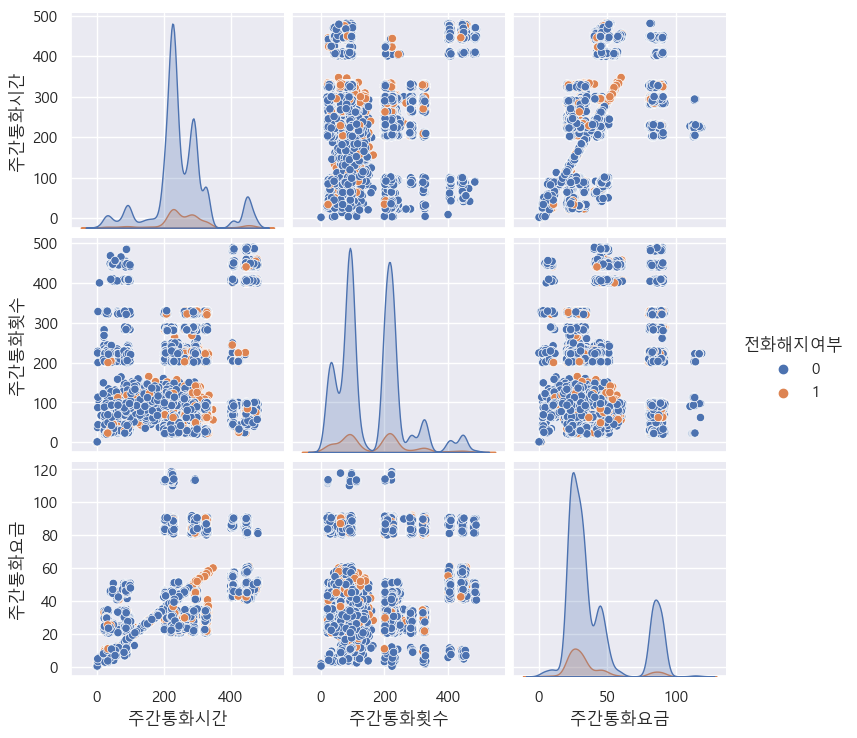

In [13]:
train_moring = train[['주간통화시간', '주간통화횟수', '주간통화요금','전화해지여부']].copy()
sns.pairplot(data=train_moring, hue='전화해지여부')
plt.show()

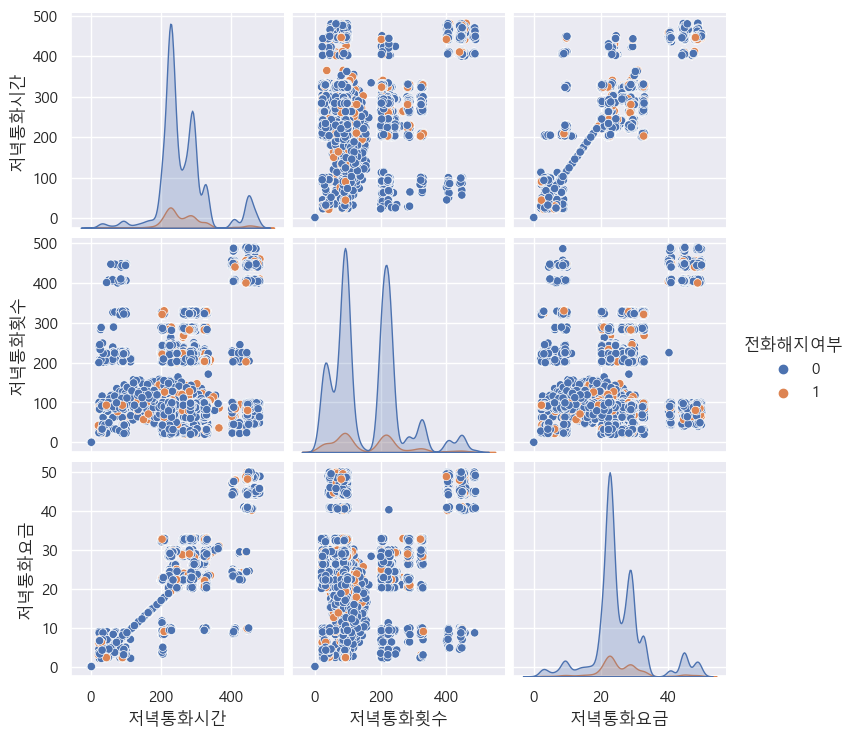

In [14]:
train_ev = train[['저녁통화시간', '저녁통화횟수','저녁통화요금','전화해지여부']].copy()
sns.pairplot(data=train_ev, hue='전화해지여부')
plt.show()

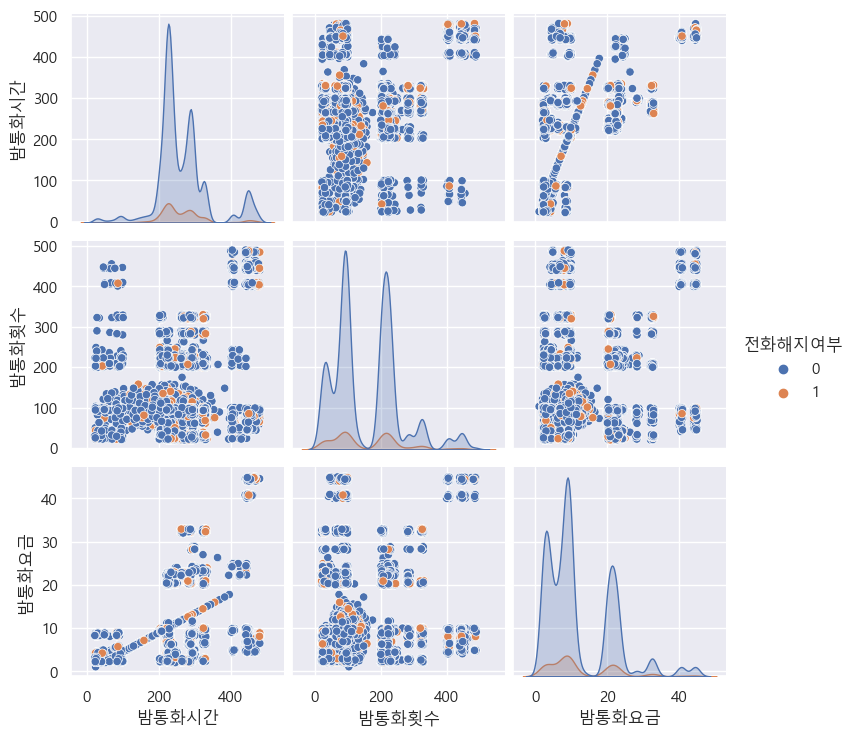

In [15]:
train_n = train[['밤통화시간', '밤통화횟수', '밤통화요금','전화해지여부']].copy()
sns.pairplot(data=train_n, hue='전화해지여부')
plt.show()

## bar plot

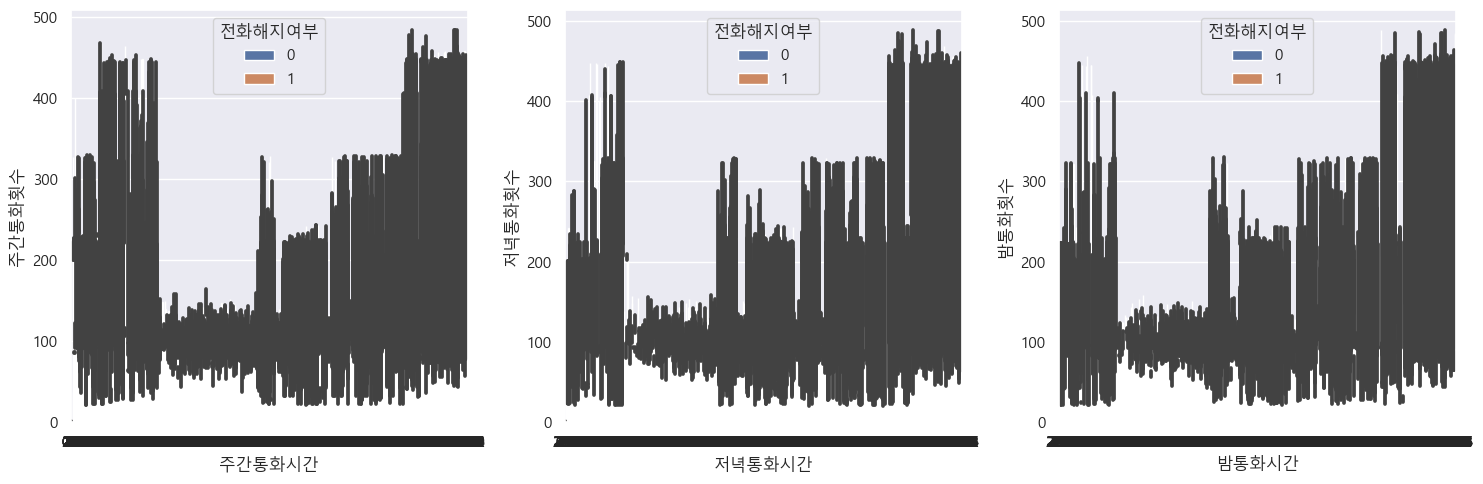

In [16]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5)  ) 

x_list = ['주간통화시간','저녁통화시간','밤통화시간']
y_list=['주간통화횟수','저녁통화횟수','밤통화횟수']
for i, col in enumerate(x_list) :  #train.columns) :
    r = i//3
    c = i%3

    sns.barplot(x=x_list[i], y=y_list[i], data=train,hue='전화해지여부', ax=axes[c])

plt.tight_layout()
plt.show()

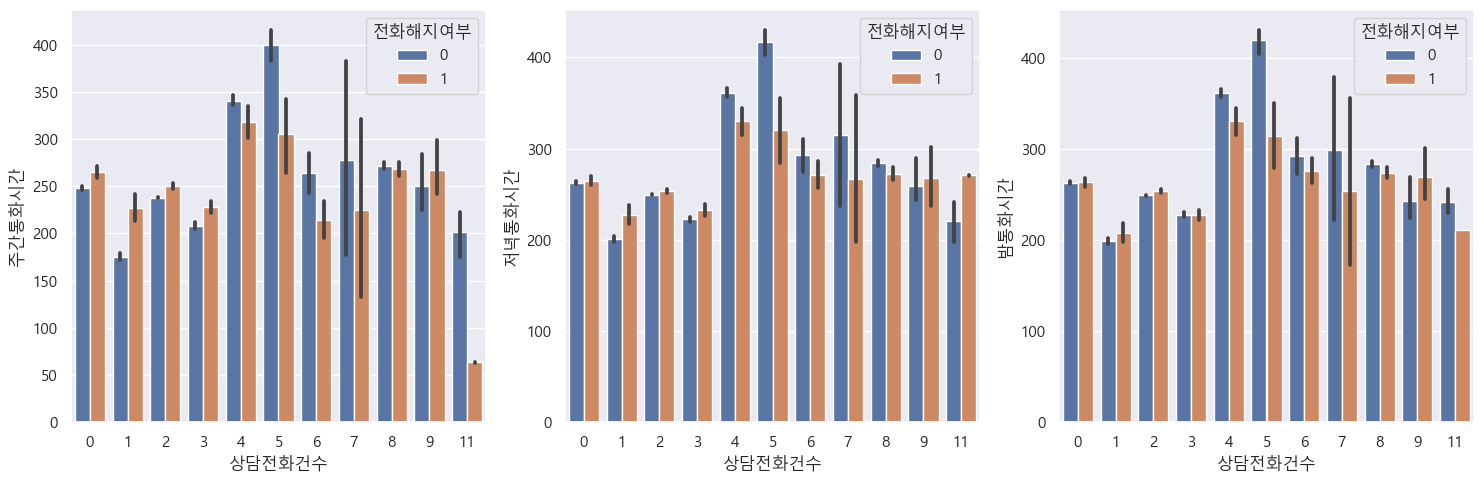

In [17]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5)  ) 
sns.barplot(y='주간통화시간', x='상담전화건수', hue='전화해지여부', data=train, ax=axes[0])
sns.barplot(y='저녁통화시간', x='상담전화건수', hue='전화해지여부', data=train, ax=axes[1])
sns.barplot(y='밤통화시간', x='상담전화건수', hue='전화해지여부', data=train, ax=axes[2])
plt.tight_layout()
plt.show()

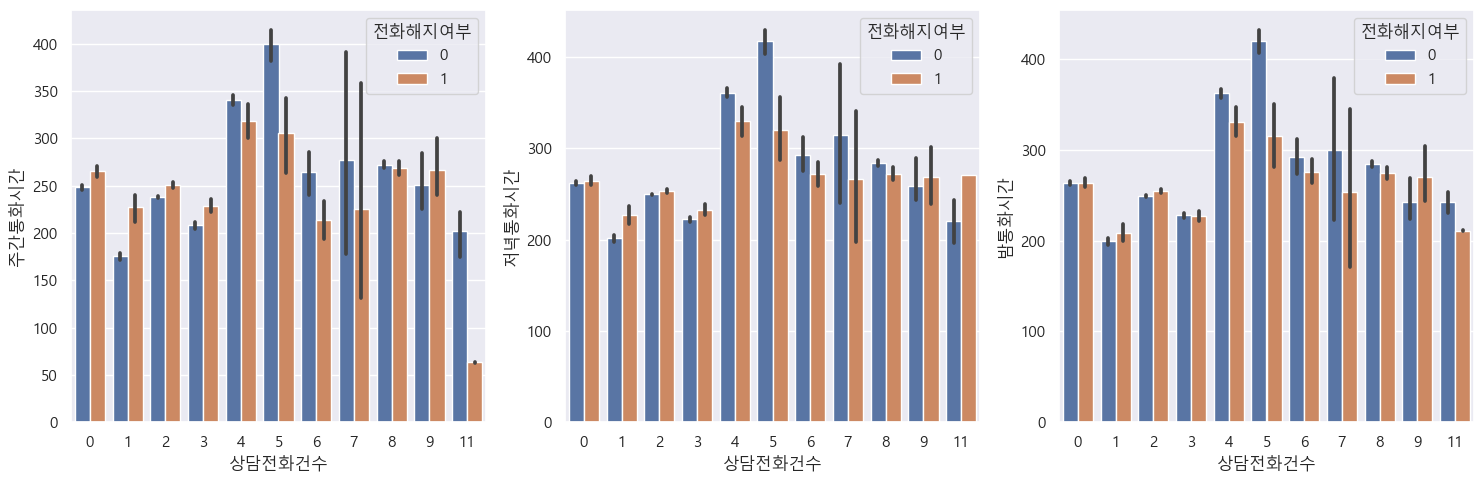

In [18]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5)  ) 
sns.barplot(y='주간통화시간', x='상담전화건수', hue='전화해지여부', data=train, ax=axes[0])
sns.barplot(y='저녁통화시간', x='상담전화건수', hue='전화해지여부', data=train, ax=axes[1])
sns.barplot(y='밤통화시간', x='상담전화건수', hue='전화해지여부', data=train, ax=axes[2])
plt.tight_layout()
plt.show()

#  구간화

In [19]:
cut_var=pd.cut(train['저녁통화시간'],10)

In [20]:
cut_idx=cut_var.value_counts().sort_index().index.values
cut_idx_dic={"cut_index":cut_idx}
cut_idx_dic

{'cut_index': [(-0.381, 48.25], (48.25, 96.4], (96.4, 144.55], (144.55, 192.7], (192.7, 240.85], (240.85, 289.0], (289.0, 337.15], (337.15, 385.3], (385.3, 433.45], (433.45, 481.6]]
 Categories (10, interval[float64, right]): [(-0.381, 48.25] < (48.25, 96.4] < (96.4, 144.55] < (144.55, 192.7] ... (289.0, 337.15] < (337.15, 385.3] < (385.3, 433.45] < (433.45, 481.6]]}

In [21]:
cut_df=pd.DataFrame(cut_idx_dic)
cut_df

,cut_index
0,"(-0.381, 48.25]"
1,"(48.25, 96.4]"
2,"(96.4, 144.55]"
3,"(144.55, 192.7]"
4,"(192.7, 240.85]"
5,"(240.85, 289.0]"
6,"(289.0, 337.15]"
7,"(337.15, 385.3]"
8,"(385.3, 433.45]"
9,"(433.45, 481.6]"


In [22]:
train_idx=train.copy()

In [23]:
train_idx['cut']=cut_var
train_idx['cut']=train_idx['cut'].cat.codes

In [24]:
train_idx['cut'].unique()

array([5, 4, 6, 9, 0, 1, 8, 3, 2, 7], dtype=int8)

In [25]:
train_idx['cut_var']=cut_var

In [26]:
train_idx.head()

,가입일,음성사서함이용,주간통화시간,주간통화횟수,주간통화요금,저녁통화시간,저녁통화횟수,저녁통화요금,밤통화시간,밤통화횟수,밤통화요금,상담전화건수,전화해지여부,cut,cut_var
0,329,0,99.2,93,27.3,268.8,68,28.92,262.9,328,32.89,2,0,5,"(240.85, 289.0]"
1,2,80,323.9,323,83.7,269.4,326,32.09,322.8,209,32.32,2,0,5,"(240.85, 289.0]"
2,93,28,282.4,323,34.2,207.0,322,32.82,280.8,328,8.28,0,0,4,"(192.7, 240.85]"
3,223,1,221.4,223,25.1,233.0,61,23.90,203.8,234,9.36,0,0,4,"(192.7, 240.85]"
4,222,0,96.3,222,28.7,223.9,69,28.08,263.1,223,2.80,8,0,4,"(192.7, 240.85]"


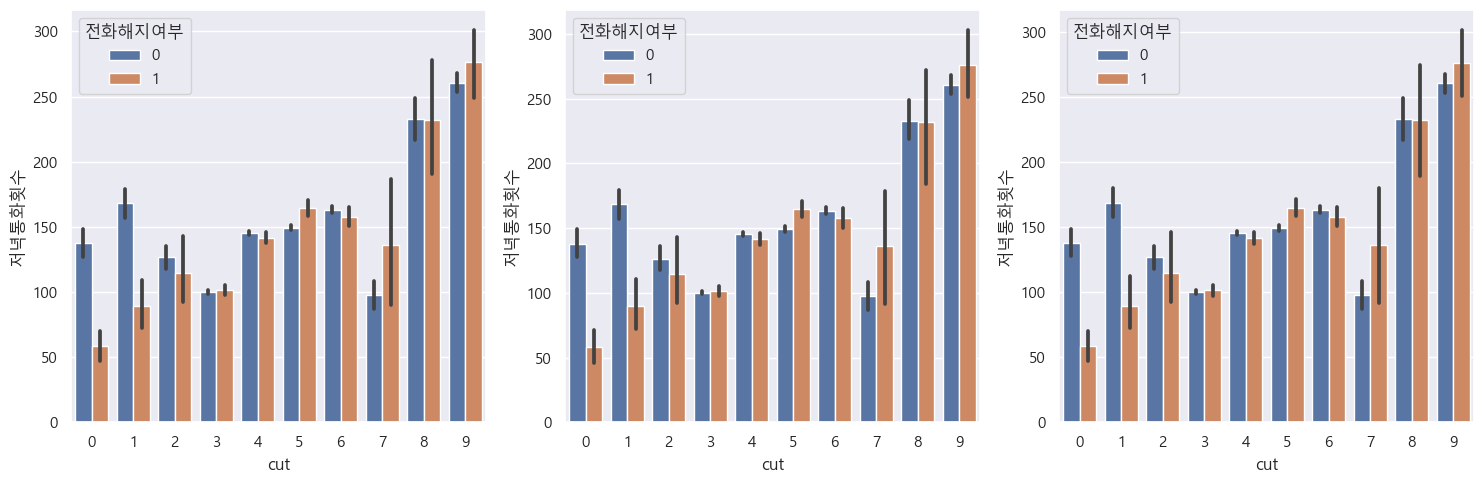

In [27]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5)  ) 

x_list = ['주간통화시간','저녁통화시간','밤통화시간']
y_list=['주간통화횟수','저녁통화횟수','밤통화횟수']
for i, col in enumerate(x_list) :  #train.columns) :
    r = i//3
    c = i%3

    sns.barplot(x='cut', y='저녁통화횟수', data=train_idx,hue='전화해지여부', ax=axes[c])

plt.tight_layout()
plt.show()

<AxesSubplot: xlabel='상담전화건수', ylabel='cut'>

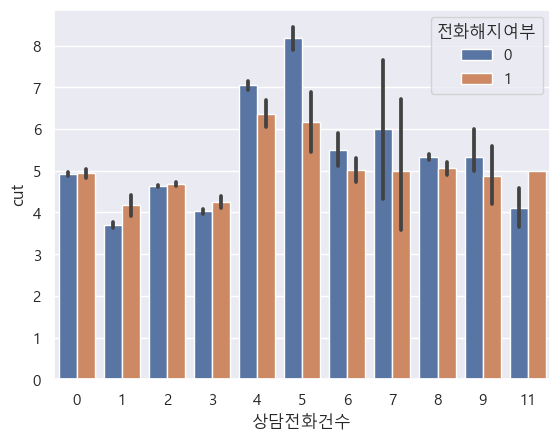

In [28]:
sns.barplot(x='상담전화건수', y='cut', data=train_idx,hue='전화해지여부')

In [29]:
train_idx[train_idx['상담전화건수']==10]

,가입일,음성사서함이용,주간통화시간,주간통화횟수,주간통화요금,저녁통화시간,저녁통화횟수,저녁통화요금,밤통화시간,밤통화횟수,밤통화요금,상담전화건수,전화해지여부,cut,cut_var


In [30]:
train_idx['상담전화건수'][train_idx['전화해지여부']==1].value_counts()

2     1678
0      607
8      313
4      252
3      194
6      112
1       80
5       58
9       15
7        7
11       2
Name: 상담전화건수, dtype: int64

In [31]:
test[test['상담전화건수']>=9]

,ID,가입일,음성사서함이용,주간통화시간,주간통화횟수,주간통화요금,저녁통화시간,저녁통화횟수,저녁통화요금,밤통화시간,밤통화횟수,밤통화요금,상담전화건수
268,TEST_00268,283,21,283.5,221,21.2,289.4,92,22.8200,269.9,81,22.980,9
567,TEST_00567,113,0,292.8,227,113.4,264.1,99,22.2110,226.3,222,9.220,11
3362,TEST_03362,44,0,226.2,222,46.4,243.2,225,22.2900,224.0,222,20.220,9
3815,TEST_03815,223,0,222.3,223,117.1,209.4,203,22.1120,263.5,92,2.200,11
6077,TEST_06077,21,0,203.2,222,23.5,113.6,203,6.9900,270.2,220,2.620,11
6448,TEST_06448,202,1,228.6,93,24.6,223.5,222,9.2200,223.5,93,11.211,11
6995,TEST_06995,34,0,225.3,223,34.8,232.8,223,22.2900,222.4,223,20.220,9
7460,TEST_07460,455,40,458.2,440,41.6,456.9,94,44.5400,466.9,80,44.950,9
8014,TEST_08014,283,20,284.0,321,21.1,288.8,93,32.8200,269.9,80,32.980,9
8093,TEST_08093,89,0,230.5,222,89.8,282.8,229,22.2900,222.3,223,20.220,9


## boxplot
- outlier 
    - 가입일 : nlargest 3
    - 음성사서함 이용(max)

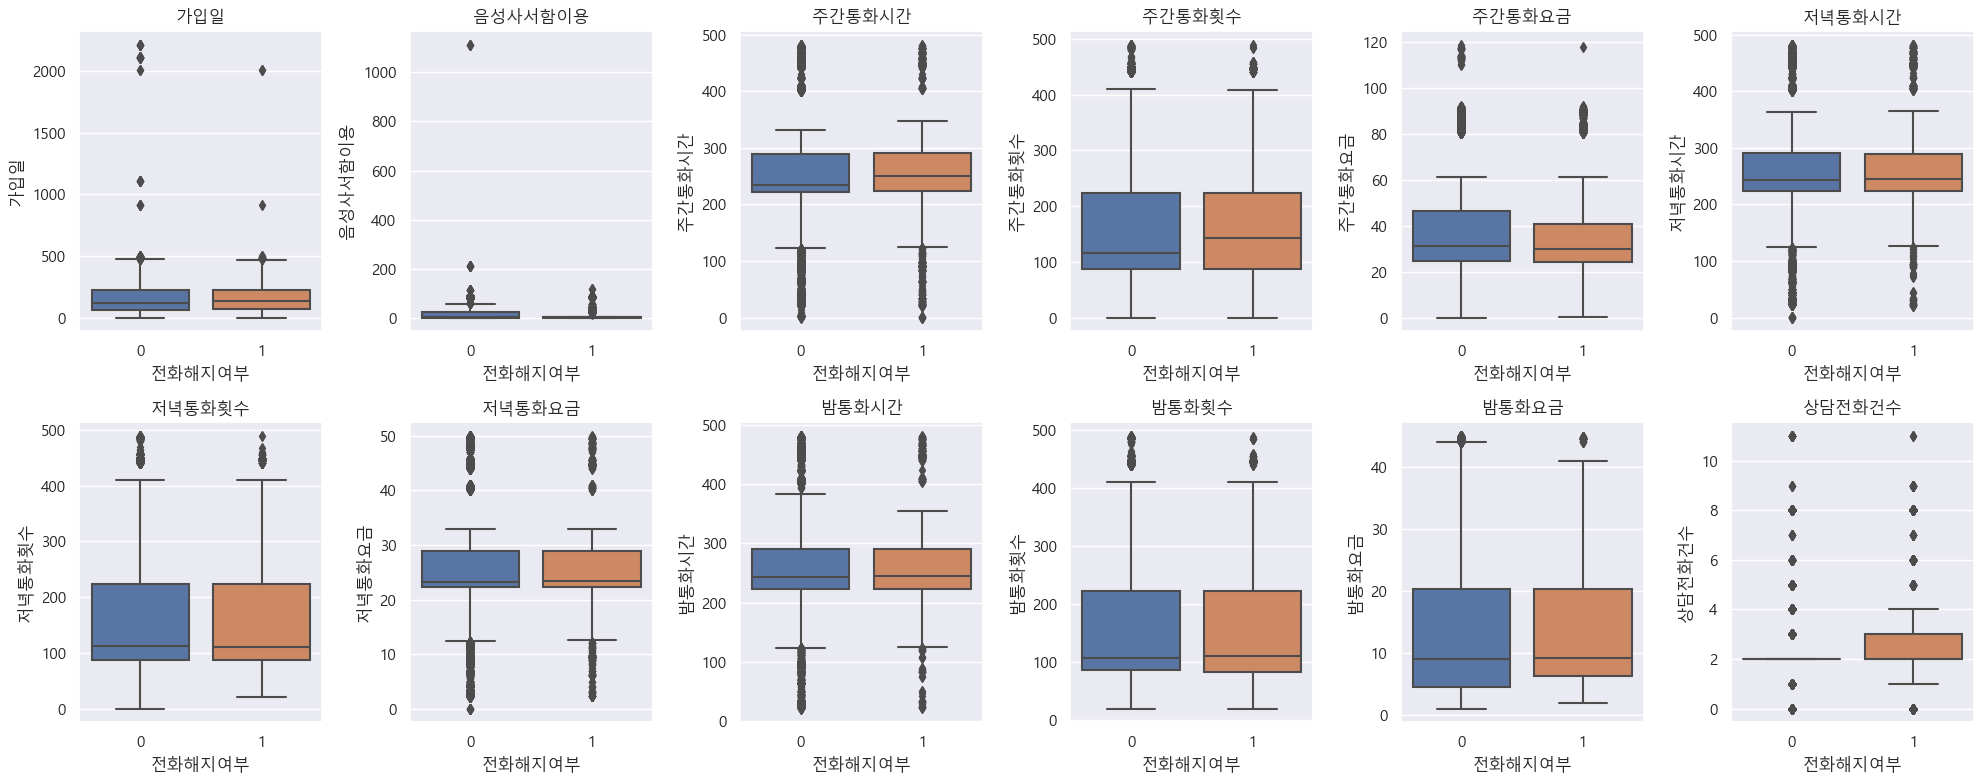

In [32]:
fig, axes = plt.subplots(2, 6, figsize=(20, 8)  ) 
col_list=['가입일', '음성사서함이용', '주간통화시간', '주간통화횟수', '주간통화요금', '저녁통화시간', '저녁통화횟수', '저녁통화요금', '밤통화시간', '밤통화횟수', '밤통화요금', '상담전화건수']
for i, col in enumerate(col_list) :  #train.columns) :
    r = i//6
    c = i%6
    axes[r][c].set_title(col)
    sns.boxplot(data=train,y=col,x='전화해지여부', ax=axes[r][c])

plt.tight_layout()
plt.show()

## 점수

In [33]:
y=train['전화해지여부']
X=train.drop('전화해지여부',axis=1)

X_train,X_test,y_train,y_test = train_test_split(X, y , test_size=0.2, random_state=21)
model = RandomForestClassifier( random_state=21)
model.fit(X_train, y_train)
pred = model.predict(X_test)

print(  confusion_matrix(y_test,  pred)   )
print(f"정확도: {accuracy_score(y_test, pred):.4f}, 정밀도: {precision_score(y_test, pred):.4f}, 재현율: {recall_score(y_test, pred):.4f}, F1: {f1_score(y_test, pred):.4f}")

[[5272   84]
 [ 428  256]]
정확도: 0.9152, 정밀도: 0.7529, 재현율: 0.3743, F1: 0.5000


# 파생피쳐

## 시간당 요금

In [34]:
traincp2=train.copy()

- 0인값 대체하기

In [35]:
idx=train['주간통화시간'][train['주간통화시간']==0].index.values

In [36]:
train['주간통화시간'].loc[idx]=0.1

In [37]:
train['주간통화시간'][train['주간통화시간']==0]

Series([], Name: 주간통화시간, dtype: float64)

- 시간당 요금 계산

In [38]:
time_list=[ '주간통화시간','주간통화요금','저녁통화시간','저녁통화요금','밤통화시간','밤통화요금',]

for i in range(0,len(time_list),2):    
    print(time_list[i])
    print(time_list[i+1])
    train[f'{time_list[i]}당요금']=train[time_list[i+1]] / train[time_list[i]]

주간통화시간
주간통화요금
저녁통화시간
저녁통화요금
밤통화시간
밤통화요금


In [39]:
train.head()

,가입일,음성사서함이용,주간통화시간,주간통화횟수,주간통화요금,저녁통화시간,저녁통화횟수,저녁통화요금,밤통화시간,밤통화횟수,밤통화요금,상담전화건수,전화해지여부,주간통화시간당요금,저녁통화시간당요금,밤통화시간당요금
0,329,0,99.2,93,27.3,268.8,68,28.92,262.9,328,32.89,2,0,0.275202,0.107589,0.125105
1,2,80,323.9,323,83.7,269.4,326,32.09,322.8,209,32.32,2,0,0.258413,0.119117,0.100124
2,93,28,282.4,323,34.2,207.0,322,32.82,280.8,328,8.28,0,0,0.121105,0.158551,0.029487
3,223,1,221.4,223,25.1,233.0,61,23.90,203.8,234,9.36,0,0,0.113369,0.102575,0.045927
4,222,0,96.3,222,28.7,223.9,69,28.08,263.1,223,2.80,8,0,0.298027,0.125413,0.010642


## 점수

In [40]:
y=train['전화해지여부']
X=train.drop('전화해지여부',axis=1)

X_train,X_test,y_train,y_test = train_test_split(X, y , test_size=0.2, random_state=21)
model = RandomForestClassifier( random_state=21)
model.fit(X_train, y_train)
pred = model.predict(X_test)

print(  confusion_matrix(y_test,  pred)   )
print(f"정확도: {accuracy_score(y_test, pred):.4f}, 정밀도: {precision_score(y_test, pred):.4f}, 재현율: {recall_score(y_test, pred):.4f}, F1: {f1_score(y_test, pred):.4f}")

[[5285   71]
 [ 452  232]]
정확도: 0.9134, 정밀도: 0.7657, 재현율: 0.3392, F1: 0.4701


In [41]:
dfdfdfdfdfdf

NameError: name 'dfdfdfdfdfdf' is not defined

# outlier

In [ ]:
tro2=tro.copy()

In [ ]:
del_index=tro[tro['음성사서함이용']==tro['음성사서함이용'].max()].index.values

In [ ]:
del_index2=tro['가입일'].nlargest(3).index.values

In [ ]:
tro=tro.drop(del_index,axis=0)

In [ ]:
tro=tro.drop(del_index2,axis=0)

In [ ]:
y=tro['전화해지여부']
X=tro.drop('전화해지여부',axis=1)

X_train,X_test,y_train,y_test = train_test_split(X, y , test_size=0.2, random_state=21)
model = RandomForestClassifier( random_state=21)
model.fit(X_train, y_train)
pred = model.predict(X_test)

print(  confusion_matrix(y_test,  pred)   )
print(f"정확도: {accuracy_score(y_test, pred):.4f}, 정밀도: {precision_score(y_test, pred):.4f}, 재현율: {recall_score(y_test, pred):.4f}, F1: {f1_score(y_test, pred):.4f}")

# 데이터 증강

## Under Sampling

In [ ]:
train.shape

In [ ]:
train.columns

In [ ]:
train0_size=train[train['전화해지여부']==1].shape[0]
train0_size

In [ ]:
train[train['전화해지여부']==0].shape

### TomekLinks
class imblearn.under_sampling.TomekLinks(*, sampling_strategy='auto', n_jobs=None)

In [ ]:
from imblearn.under_sampling import TomekLinks

y = train['전화해지여부']
X = train.drop(['전화해지여부'], axis=1)

tl = TomekLinks(sampling_strategy='auto')
X_s, y_s = tl.fit_sample(X, y)

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X_s, y_s , test_size=0.2, random_state=21)
model = RandomForestClassifier( random_state=21)
model.fit(X_train, y_train)
pred = model.predict(X_test)

print(  confusion_matrix(y_test,  pred)   )
print(f"정확도: {accuracy_score(y_test, pred):.4f}, 정밀도: {precision_score(y_test, pred):.4f}, 재현율: {recall_score(y_test, pred):.4f}, F1: {f1_score(y_test, pred):.4f}")

## Over Sampling

In [ ]:
from imblearn.over_sampling import SMOTE

y = train['전화해지여부']
X = train.drop(['전화해지여부'], axis=1)

X_s, y_s = SMOTE(sampling_strategy='auto', random_state=21).fit_resample(X,y)
print(  len(X_s), len(y_s) )

y_s.value_counts()

### 점수

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X_s, y_s , test_size=0.2, random_state=21)
model = RandomForestClassifier( random_state=21)
model.fit(X_train, y_train)
pred = model.predict(X_test)

print(  confusion_matrix(y_test,  pred)   )
print(f"정확도: {accuracy_score(y_test, pred):.4f}, 정밀도: {precision_score(y_test, pred):.4f}, 재현율: {recall_score(y_test, pred):.4f}, F1: {f1_score(y_test, pred):.4f}")

In [ ]:
tro=pd.concat([X_s, y_s],axis=1,ignore_index=False)
tro.describe()

In [ ]:
tro[['주간통화시간','저녁통화시간','밤통화시간']].min()

# 제출

In [ ]:
test=test.drop('ID',axis=1)

In [ ]:
pred = model.predict(test)

In [ ]:
sub=pd.read_csv('sample_submission.csv')
sub['전화해지여부']=pred
sub.to_csv('submit2.csv',index=False)